In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.combine import SMOTETomek

C:\Users\fwitt\Anaconda3\envs\ds36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Datensatz generieren

In [2]:
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=100, random_state=10)

## Dimensionen reduzieren

In [3]:
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X)

## Upsampling des Datensatzes

In [4]:
sm = SMOTETomek()
X_resampled, y_resampled = sm.fit_sample(X, y)
X_res_vis = pca.transform(X_resampled)

## Größe des Datensatzes vor dem Upsamling

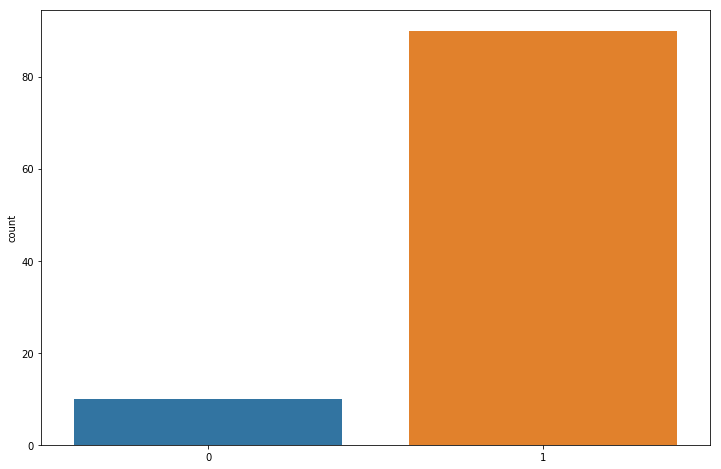

In [5]:
plt.figure(figsize=(12, 8))
sns.countplot(x=y);

## Größe des Datensatzes vor dem Upsamling

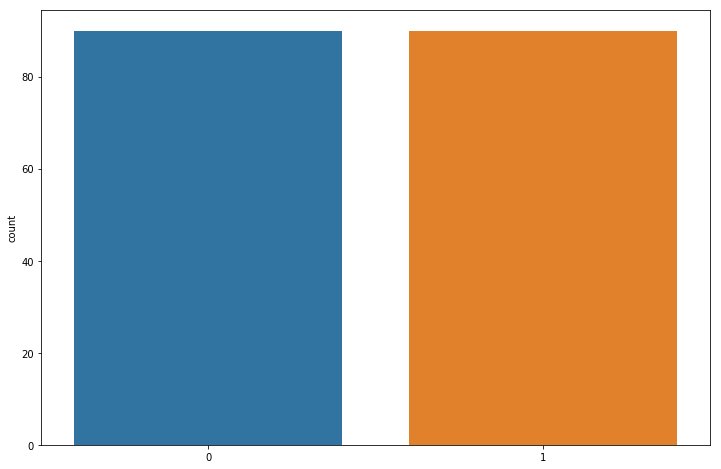

In [6]:
plt.figure(figsize=(12, 8))
sns.countplot(x=y_resampled);

## Vergleich zwischen altem und neuem Datensatz

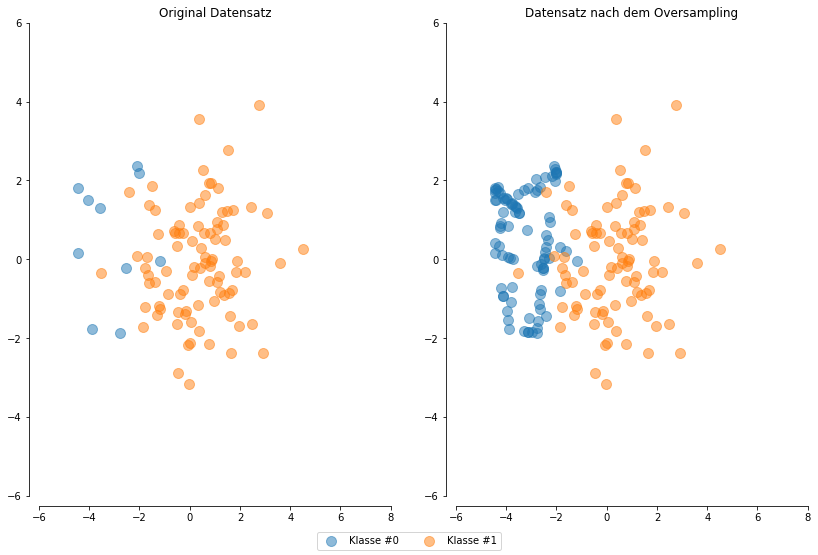

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 8))

c0 = ax1.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Klasse #0", alpha=0.5, s=100)
c1 = ax1.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Klasse #1", alpha=0.5, s=100)
ax1.set_title('Original Datensatz')

ax2.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1],
            label="Klasse #0", alpha=0.5, s=100)
ax2.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1],
            label="Klasse #1", alpha=0.5, s=100)
ax2.set_title('Datensatz nach dem Oversampling')

# make nice plotting
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

plt.figlegend((c0, c1), ('Klasse #0', 'Klasse #1'), loc='lower center', ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()